<a href="https://colab.research.google.com/github/MariaGabriela87/Data-science/blob/Cuarta-entrega/Linea_144_cuarta_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Línea 144 - Grupo 2***
---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4

Integrantes:
- María Gabriela García
- Valentina Madonia

# **Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/MyDrive/Data Science/df_final_mod.csv')

Mounted at /content/drive


In [ ]:
pd.options.display.max_columns = None # Muestra todas las columnas al imprimir df

In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,1,0,0,0,2
1,0,46.0,1,1,0,0,1,1,5
2,7,28.0,0,0,0,0,1,1,5
3,12,34.0,0,0,0,0,0,1,0
4,0,38.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
63140,0,36.0,0,0,0,0,1,1,5
63141,0,30.0,1,1,0,0,1,1,5
63142,0,22.0,1,1,0,0,1,1,0
63143,0,44.0,1,1,0,0,1,1,0


In [ ]:
df_final['tipo_de_violencia_fisica'].value_counts() / len(df_final)

,count
tipo_de_violencia_fisica,
1,0.690395
0,0.309605


In [ ]:
X = df_final.values

# **Métodos para elegir el K**

## Elbow

In [ ]:
wcss = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

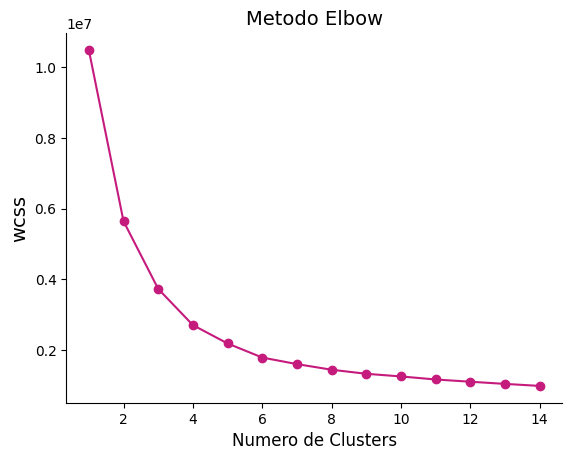

In [ ]:
plt.plot(range(1, 15), wcss, c="#c51b7d", marker='o')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('Inercia media', size=14)
plt.show()

## Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

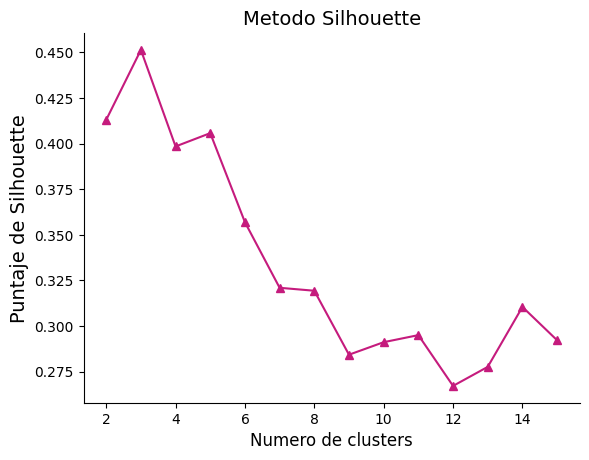

In [ ]:
plt.plot(range(2,16),sil, c="#c51b7d", marker='^')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

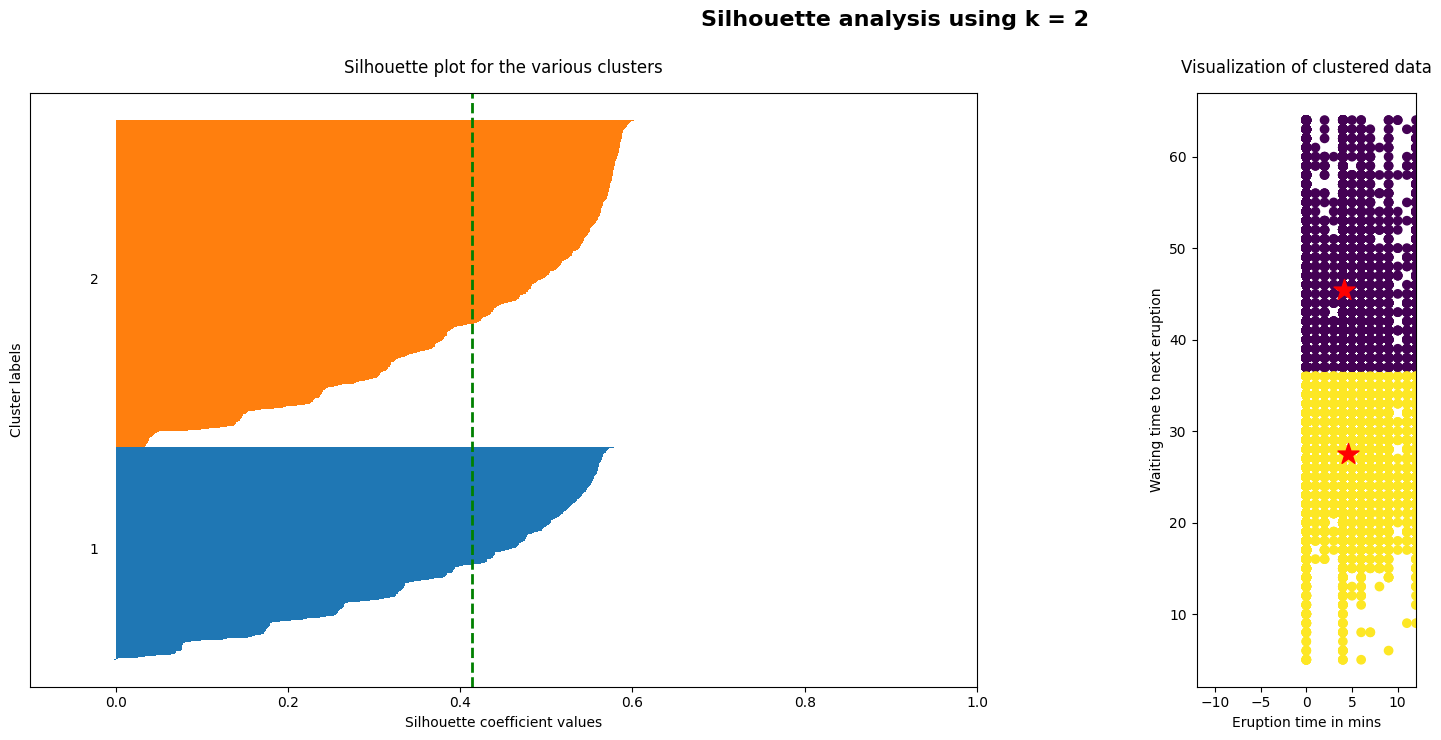

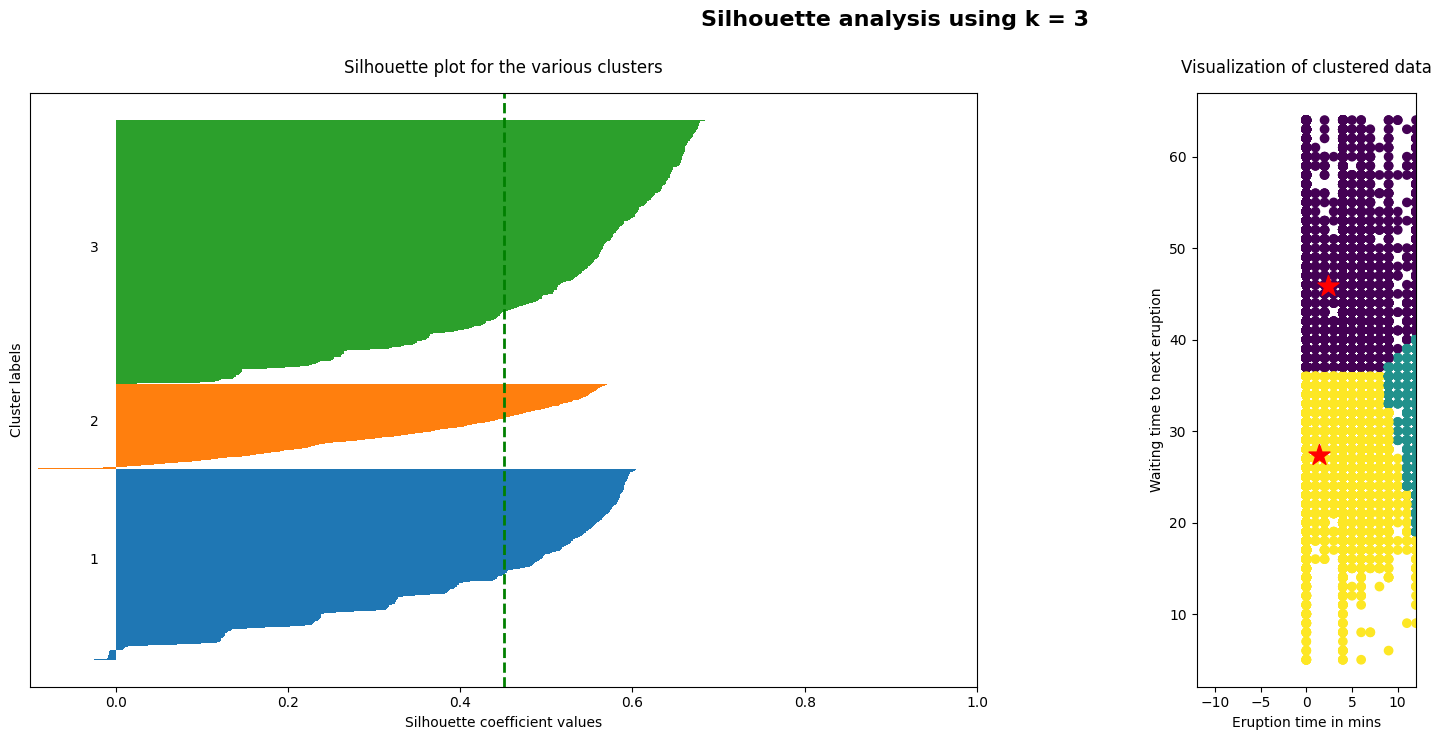

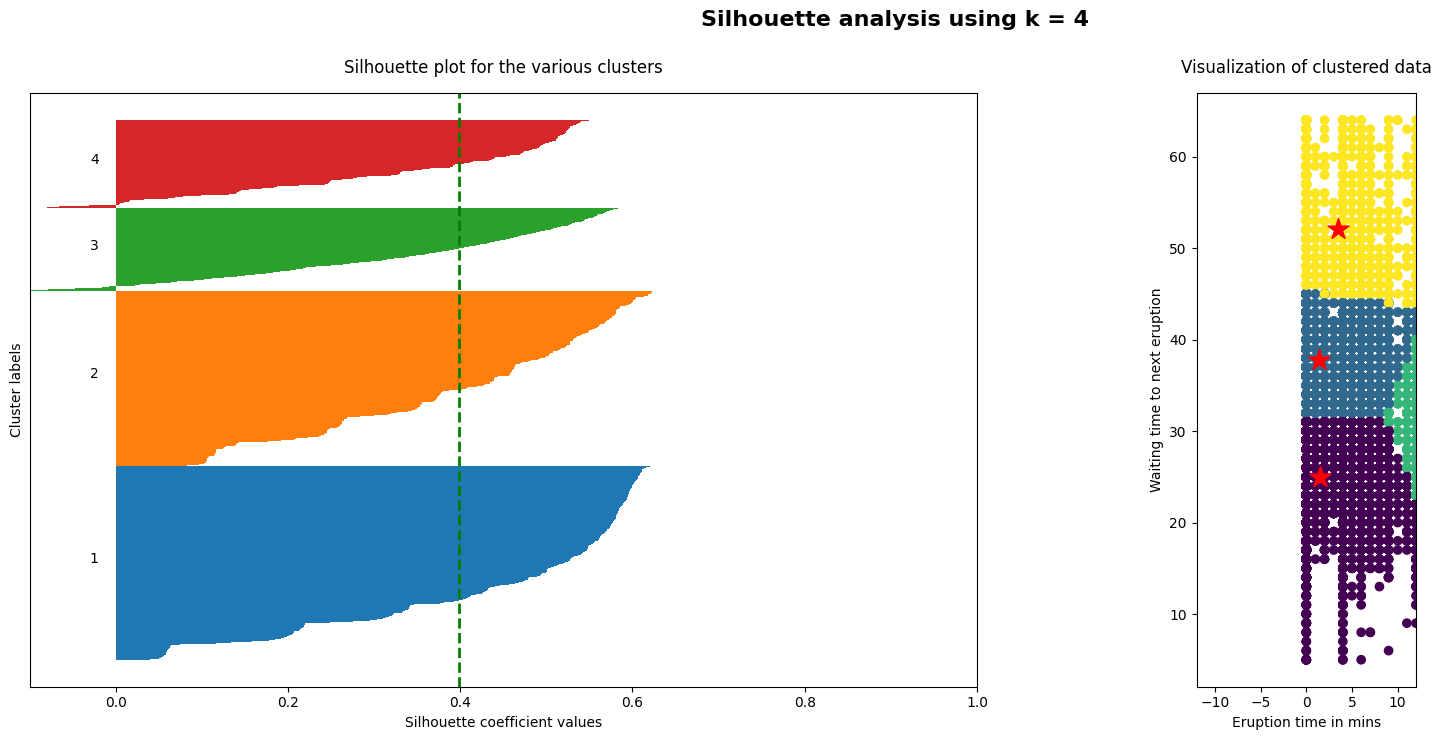

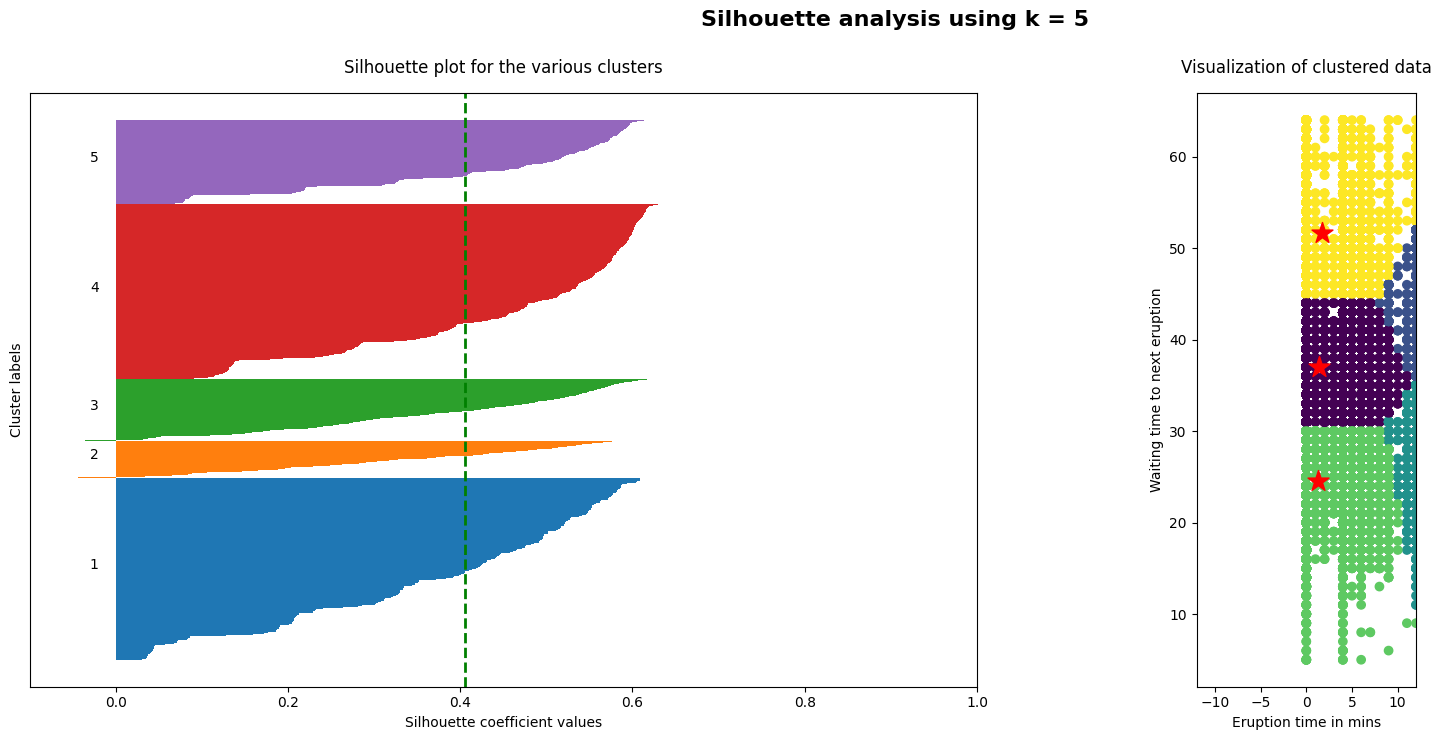

In [ ]:
X_std = X
silhouette_vals = silhouette_samples(X_std, labels)
avg_score = np.mean(silhouette_vals)

lista_k = [2, 3, 4, 5]


for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    kmS = KMeans(n_clusters=k)
    labels = kmS.fit_predict(X_std)
    centroids = kmS.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)


    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);


    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

# K- means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


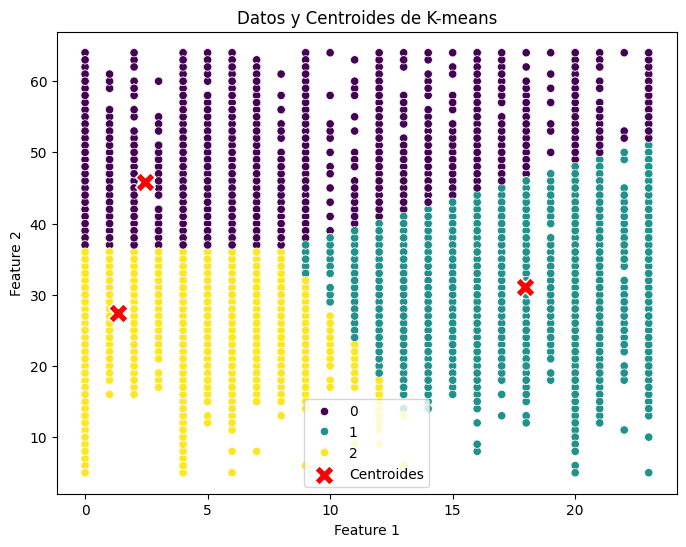

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', marker='o')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
df_final['cluster'] = kmeans.labels_
pd.set_option('display.max_columns', None)
df_final.groupby('cluster').describe()

prov_persona_en_situacion_violencia                                  \
                                      count       mean       std  min   25%   
cluster                                                                       
0                                   22342.0   2.430534  4.331450  0.0   0.0   
1                                    9974.0  17.949669  4.127988  9.0  14.0   
2                                   30829.0   1.359726  2.323451  0.0   0.0   

                          edad_persona_en_situacion_de_violencia             \
          50%   75%   max                                  count       mean   
cluster                                                                       
0         0.0   4.0  23.0                                22342.0  45.876197   
1        20.0  21.0  23.0                                 9974.0  31.027471   
2         0.0   4.0  13.0                                30829.0  27.426871   

                                                tipo_de_violencia_fisica  \
              std   min   25%   50%   75%   max                    count   
cluster                                                                    
0        6.937873  37.0  40.0  44.0  50.0  64.0                  22342.0   
1        7.552407   5.0  25.0  31.0  37.0  51.0                   9974.0   
2        5.439400   5.0  23.0  28.0  32.0  36.0                  30829.0   

                                                      \
             mean       std  min  25%  50%  75%  max   
cluster                                                
0        0.623221  0.484590  0.0  0.0  1.0  1.0  1.0   
1        0.771205  0.420078  0.0  1.0  1.0  1.0  1.0   
2        0.712933  0.452401  0.0  0.0  1.0  1.0  1.0   

        tipo_de_violencia_psicologica                                          \
                                count      mean       std  min  25%  50%  75%   
cluster                                                                         
0                             22342.0  0.623221  0.484590  0.0  0.0  1.0  1.0   
1                              9974.0  0.771205  0.420078  0.0  1.0  1.0  1.0   
2                             30829.0  0.712933  0.452401  0.0  0.0  1.0  1.0   

             tipo_de_violencia_sexual                                          \
         max                    count      mean       std  min  25%  50%  75%   
cluster                                                                         
0        1.0                  22342.0  0.139558  0.346535  0.0  0.0  0.0  0.0   
1        1.0                   9974.0  0.130439  0.336803  0.0  0.0  0.0  0.0   
2        1.0                  30829.0  0.168640  0.374440  0.0  0.0  0.0  0.0   

             tipo_de_violencia_economica_y_patrimonial                      \
         max                                     count      mean       std   
cluster                                                                      
0        1.0                                   22342.0  0.456226  0.498091   
1        1.0                                    9974.0  0.495488  0.500005   
2        1.0                                   30829.0  0.401797  0.490269   

                                 tipo_de_violencia_simbolica            \
         min  25%  50%  75%  max                       count      mean   
cluster                                                                  
0        0.0  0.0  0.0  1.0  1.0                     22342.0  0.413123   
1        0.0  0.0  0.0  1.0  1.0                      9974.0  0.148586   
2        0.0  0.0  0.0  1.0  1.0                     30829.0  0.401797   

                                           tipo_de_violencia_domestica  \
              std  min  25%  50%  75%  max                       count   
cluster                                                                  
0        0.492406  0.0  0.0  0.0  1.0  1.0                     22342.0   
1        0.355698  0.0  0.0  0.0  0.0  1.0                      9974.0   
2     

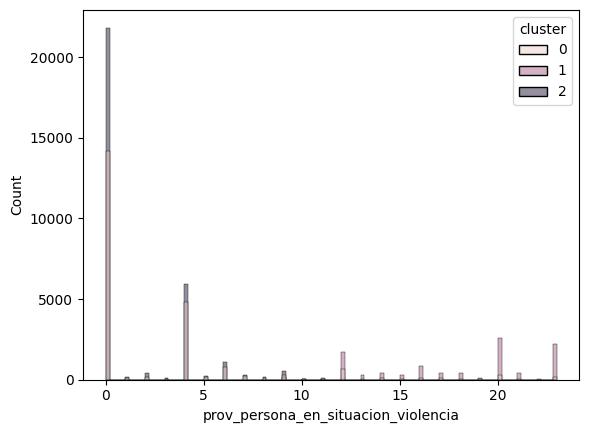

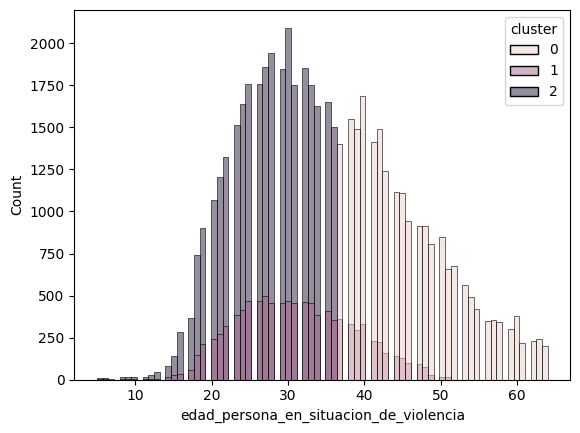

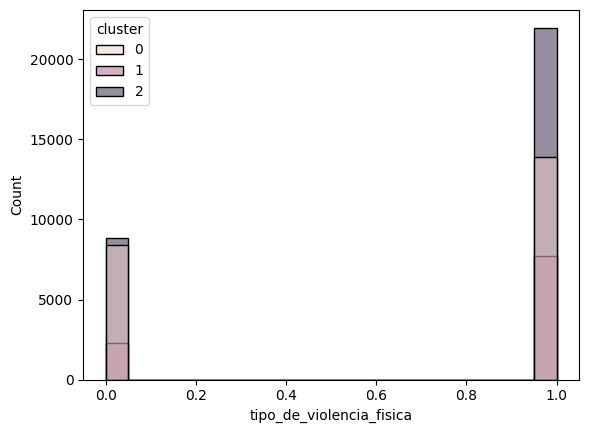

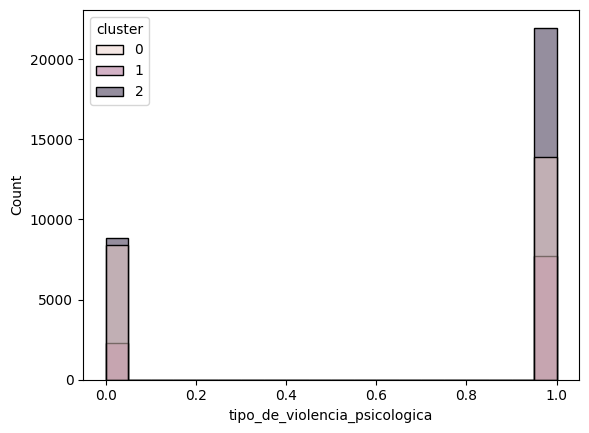

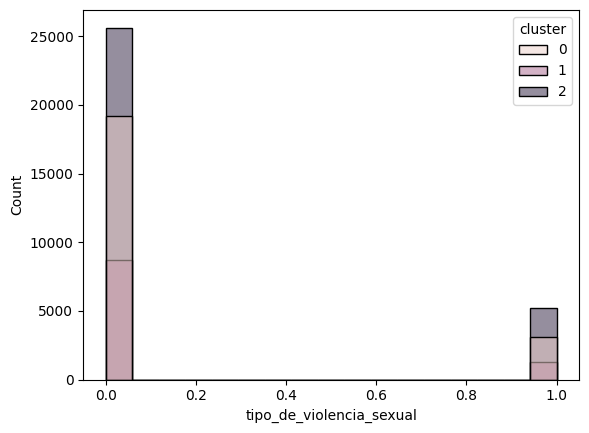

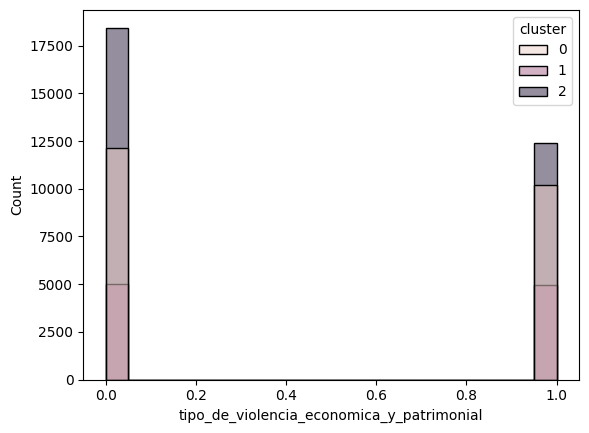

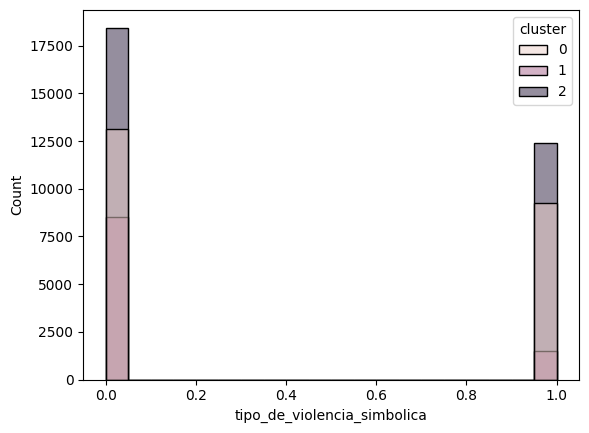

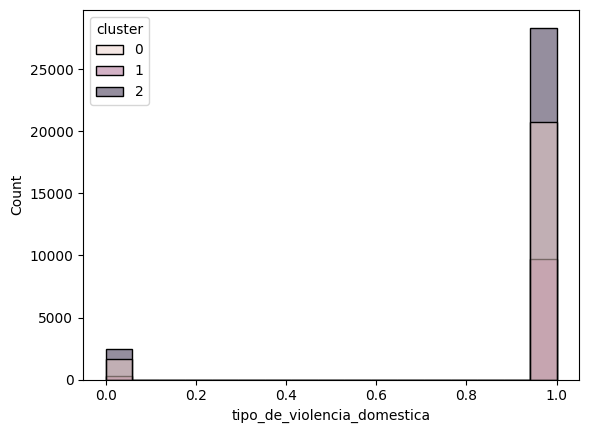

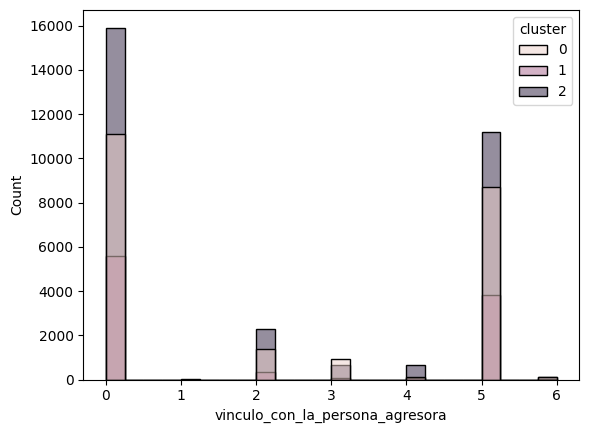

In [ ]:
for column in df_final.columns[:-1]:  # Excluye la columna 'cluster'
        sns.histplot(data=df_final, x=column, hue='cluster')
        plt.show()

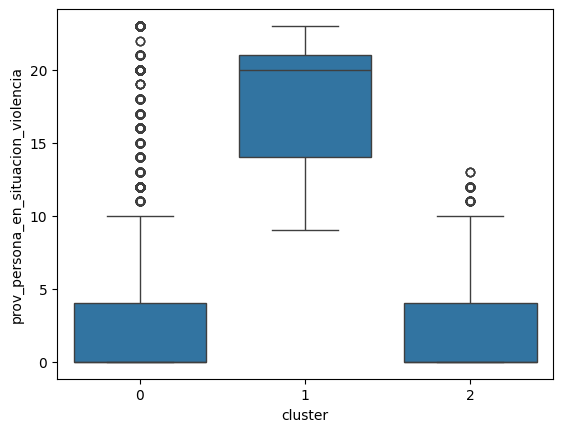

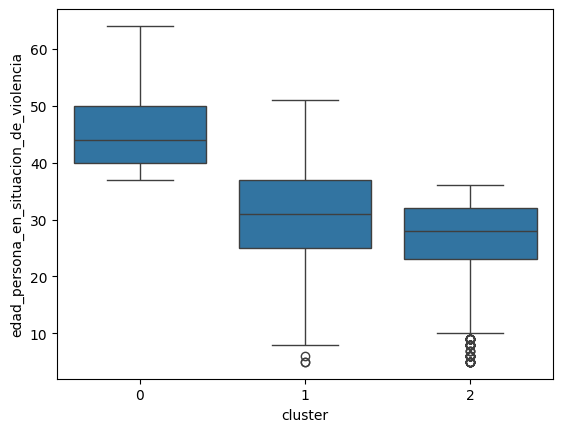

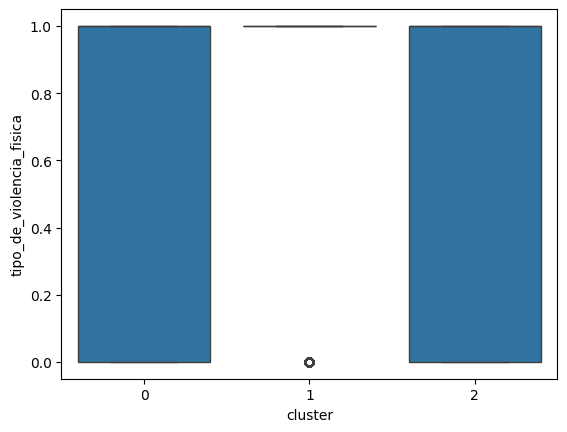

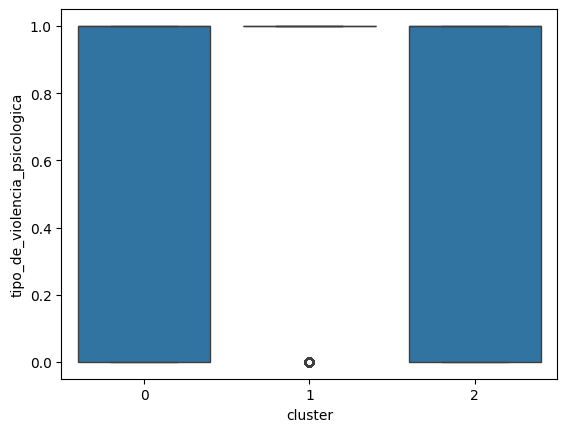

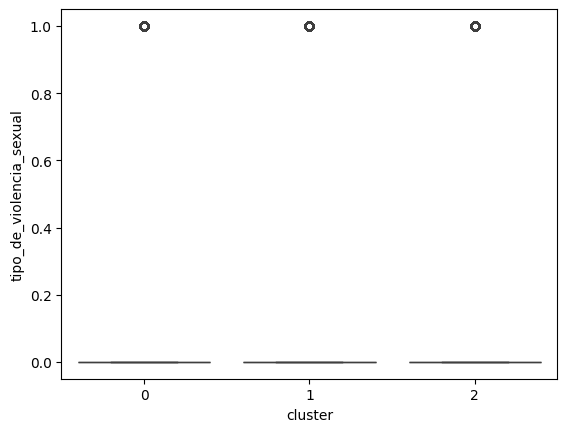

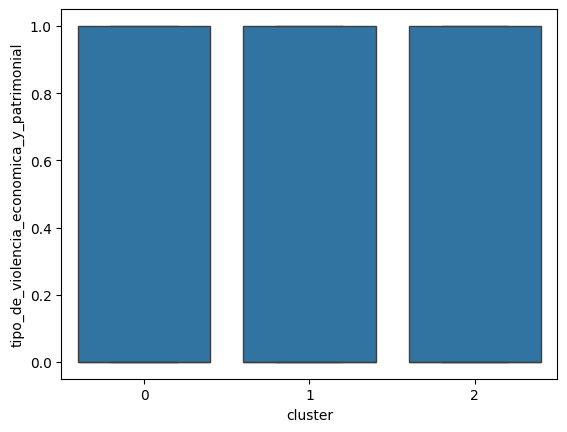

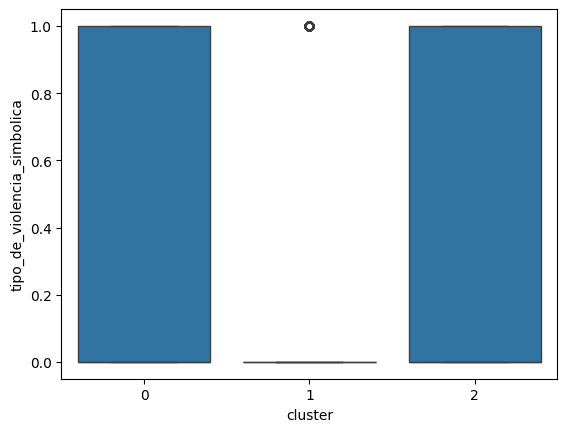

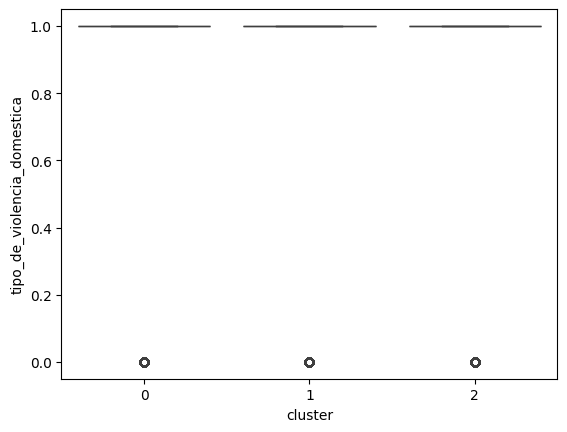

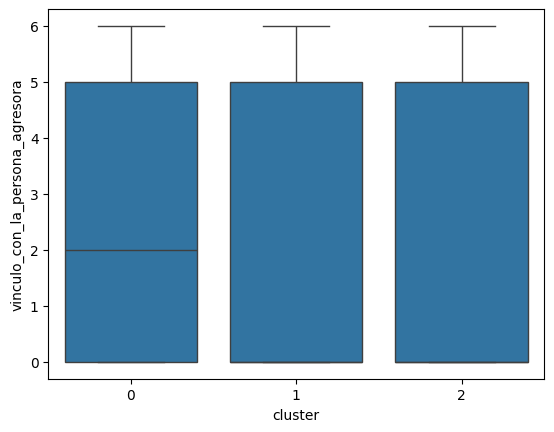

In [ ]:
for column in df_final.columns[:-1]:
        sns.boxplot(data=df_final, x='cluster', y=column)
        plt.show()

# **DBSCAN**

In [ ]:
Xd = df_final.values
db = DBSCAN(eps=2.5, min_samples=20) # eps: radio de la vecindad, min_samples: número mínimo de puntos para formar un cluster
labels = db.fit_predict(Xd)

In [ ]:
labels_db = db.labels_

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [ ]:
print('Número estimado de clusters: %d' % n_clusters_db)
print('Número estimado de puntos de ruido: %d' % n_noise_db)

Número estimado de clusters: 1
Número estimado de puntos de ruido: 131


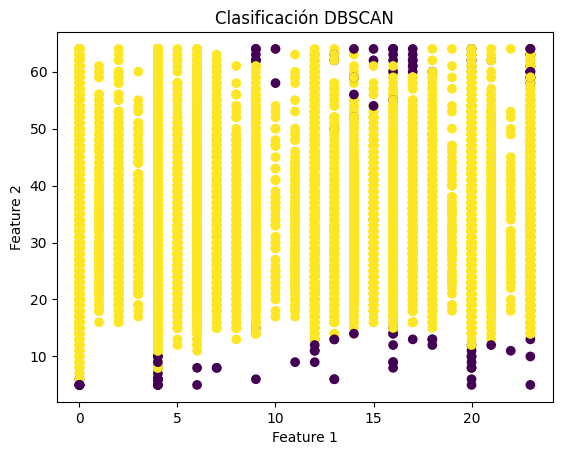

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(Xd[:, 0], Xd[:, 1], c=labels, cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación DBSCAN')  # Título del gráfico

plt.show()  # Muestra el gráfico

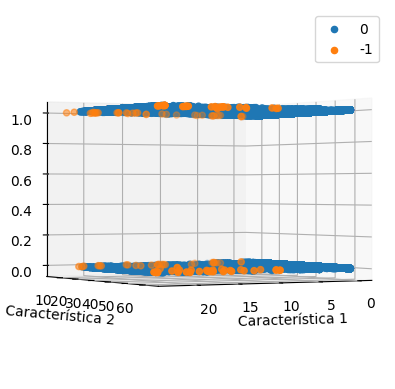

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = df_final.iloc[:, :3].values

# Crea una figura y un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos, coloreando según el cluster
unique_labels = set(labels_db)
for label in unique_labels:
    # Filtra los puntos de cada cluster
    cluster_points = X[labels_db == label]

    # Grafica los puntos del cluster
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=label)

# Configura los ejes y la leyenda
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.legend()
ax.view_init(elev=0, azim=60)
# Muestra la gráfica
plt.show()

# Probamos con una menor cantidad de columnas

In [ ]:
df_final.columns

Index(['prov_persona_en_situacion_violencia',
       'edad_persona_en_situacion_de_violencia', 'tipo_de_violencia_fisica',
       'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
       'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'vinculo_con_la_persona_agresora', 'cluster'],
      dtype='object')

In [ ]:
# Eliminamos columnas

df_final2 = df_final.drop(columns=['tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
       'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'vinculo_con_la_persona_agresora'])


In [ ]:
X2 = df_final2.values

In [ ]:
wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X2)
    wcss.append(km.inertia_)

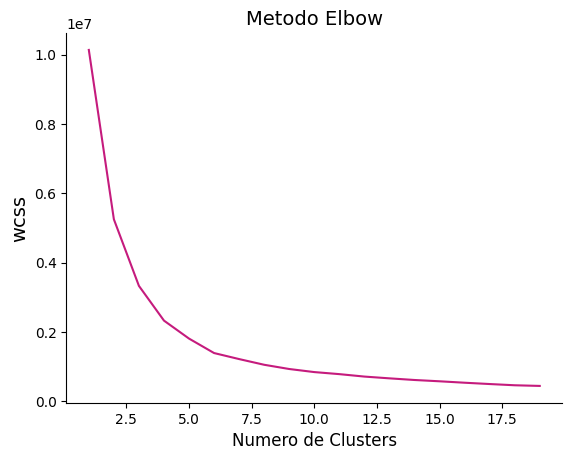

In [ ]:
plt.plot(range(1, 20), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X2)
    labels = kmeans.labels_
    sil.append(silhouette_score(X2, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

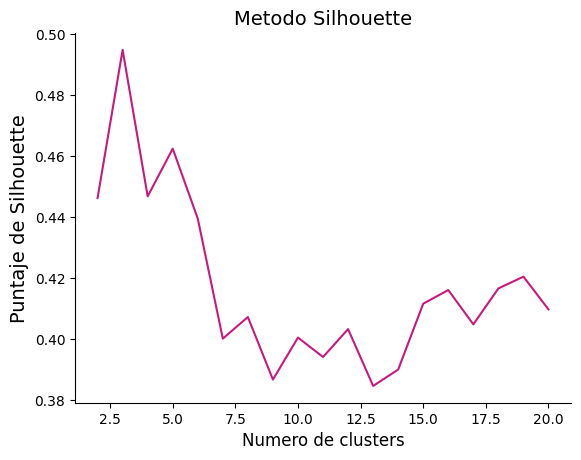

In [ ]:
plt.plot(range(2,21),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X2)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


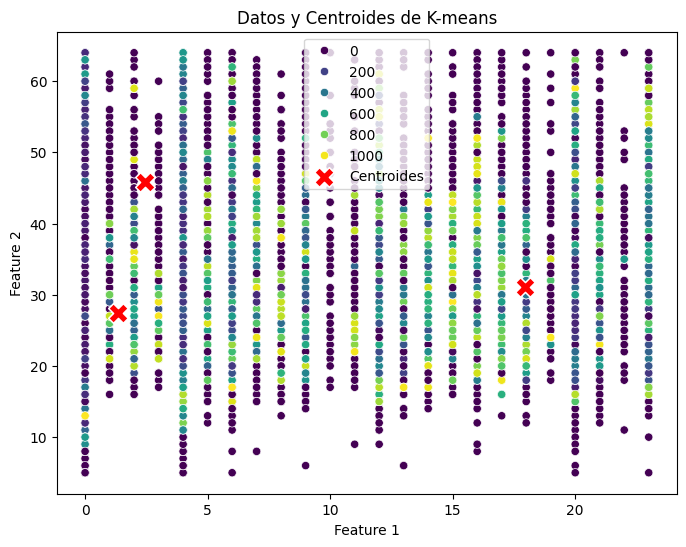

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=labels, palette='viridis', marker='o')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
Xd2 = df_final2.values
db2 = DBSCAN(eps=0.3, min_samples=5) # eps: radio de la vecindad, min_samples: número mínimo de puntos para formar un cluster
labels = db2.fit_predict(Xd2)

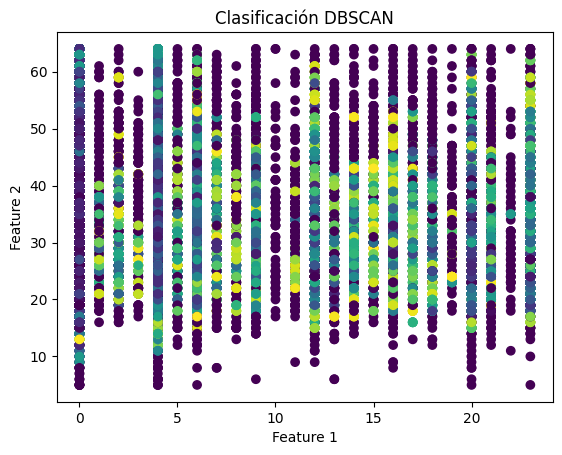

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(Xd2[:, 0], Xd2[:, 1], c=labels, cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación DBSCAN')  # Título del gráfico

plt.show()  # Muestra el gráfico